In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

In [16]:
uspjeh_studenata = pd.read_csv("st_uspjeh.csv")
streaming = pd.read_csv("streaming.csv")

In [57]:
def apply_iqr_capping(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Primjena cappinga
    # Sve vrijednosti manje od donje granice postaju donja granica
    # Sve vrijednosti veće od gornje granice postaju gornja granica
    # round() zakružujemo sve vrijednosti
    capped_series = series.clip(lower=lower_bound, upper=upper_bound)
    return capped_series

In [17]:
uspjeh_studenata

,Unnamed: 0,StudentID,Drzava,Smjer,Godina_Studija,Prosjek_Ocjena,Broj_Polozenih_Ispita,Status
0,0,1,Hrvatska,Informatika,1,3.83,8.0,Izvanredan
1,1,2,Hrvatska,Pravo,1,4.31,3.0,Izvanredan
2,2,3,Hrvatska,Informatika,5,2.16,3.0,Redovan
3,3,4,Hrvatska,Ekonomija,5,3.37,5.0,Redovan
4,4,5,Hrvatska,Informatika,4,4.51,2.0,Apsolvent
...,...,...,...,...,...,...,...,...
95,95,96,Hrvatska,Pravo,5,NaN,7.0,Redovan
96,96,97,Hrvatska,Medicina,1,2.28,3.0,Redovan
97,97,98,Hrvatska,Pravo,5,4.20,10.0,Zamrznuto
98,98,99,Hrvatska,Ekonomija,4,2.88,5.0,Redovan


In [18]:
uspjeh_studenata.isna().sum()

Unnamed: 0               0
StudentID                0
Drzava                   0
Smjer                    7
Godina_Studija           0
Prosjek_Ocjena           5
Broj_Polozenih_Ispita    6
Status                   4
dtype: int64

In [19]:
uspjeh_studenata.describe()

,Unnamed: 0,StudentID,Godina_Studija,Prosjek_Ocjena,Broj_Polozenih_Ispita
count,100.000000,100.000000,100.000000,95.000000,94.000000
mean,49.500000,50.500000,2.940000,3.392526,5.723404
std,29.011492,29.011492,1.983874,0.749001,3.105334
min,0.000000,1.000000,1.000000,1.360000,1.000000
25%,24.750000,25.750000,1.000000,2.910000,3.000000
50%,49.500000,50.500000,3.000000,3.370000,5.000000
75%,74.250000,75.250000,4.000000,3.965000,7.000000
max,99.000000,100.000000,12.000000,5.000000,14.000000


In [20]:
uspjeh_studenata.drop(columns=["Unnamed: 0", "Drzava"], inplace=True)

In [21]:
uspjeh_studenata

,StudentID,Smjer,Godina_Studija,Prosjek_Ocjena,Broj_Polozenih_Ispita,Status
0,1,Informatika,1,3.83,8.0,Izvanredan
1,2,Pravo,1,4.31,3.0,Izvanredan
2,3,Informatika,5,2.16,3.0,Redovan
3,4,Ekonomija,5,3.37,5.0,Redovan
4,5,Informatika,4,4.51,2.0,Apsolvent
...,...,...,...,...,...,...
95,96,Pravo,5,NaN,7.0,Redovan
96,97,Medicina,1,2.28,3.0,Redovan
97,98,Pravo,5,4.20,10.0,Zamrznuto
98,99,Ekonomija,4,2.88,5.0,Redovan


In [23]:
isna_values = uspjeh_studenata[uspjeh_studenata.isna().any(axis=1)]

In [24]:
isna_values

,StudentID,Smjer,Godina_Studija,Prosjek_Ocjena,Broj_Polozenih_Ispita,Status
7,8,Ekonomija,5,1.76,8.0,NaN
8,9,Informatika,2,NaN,2.0,Izvanredan
16,17,NaN,3,3.51,NaN,Redovan
20,21,NaN,3,3.65,1.0,Izvanredan
22,23,NaN,1,3.77,1.0,Izvanredan
30,31,Informatika,2,3.58,3.0,NaN
33,34,NaN,1,3.65,4.0,Redovan
36,37,NaN,1,3.96,4.0,Apsolvent
46,47,Ekonomija,3,2.99,NaN,NaN
54,55,Pravo,4,NaN,3.0,Redovan


In [25]:
uspjeh_studenata2 = uspjeh_studenata.copy()

In [ ]:
### Smjer

In [26]:
popis['Gender_Label'] = label_encoder.fit_transform(popis['Gender'])


0    Informatika
Name: Smjer, dtype: object

In [27]:
uspjeh_studenata2["Smjer"].fillna(value = "Informatika", inplace = True)

C:\Users\Syntari\AppData\Local\Temp\ipykernel_25136\3134156741.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  uspjeh_studenata2["Smjer"].fillna(value = "Informatika", inplace = True)


In [30]:
uspjeh_studenata2.isna().sum()

StudentID                0
Smjer                    0
Godina_Studija           0
Prosjek_Ocjena           5
Broj_Polozenih_Ispita    6
Status                   4
dtype: int64

In [ ]:
#### Status

In [31]:
uspjeh_studenata2["Status"].mode()

0    Redovan
Name: Status, dtype: object

In [32]:
uspjeh_studenata2["Status"].fillna(value = "Redovan", inplace = True)

C:\Users\Syntari\AppData\Local\Temp\ipykernel_25136\1444882256.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  uspjeh_studenata2["Status"].fillna(value = "Redovan", inplace = True)


In [34]:
nan_values = uspjeh_studenata2[uspjeh_studenata.isna().any(axis=1)]
nan_values

,StudentID,Smjer,Godina_Studija,Prosjek_Ocjena,Broj_Polozenih_Ispita,Status
7,8,Ekonomija,5,1.76,8.0,Redovan
8,9,Informatika,2,NaN,2.0,Izvanredan
16,17,Informatika,3,3.51,NaN,Redovan
20,21,Informatika,3,3.65,1.0,Izvanredan
22,23,Informatika,1,3.77,1.0,Izvanredan
30,31,Informatika,2,3.58,3.0,Redovan
33,34,Informatika,1,3.65,4.0,Redovan
36,37,Informatika,1,3.96,4.0,Apsolvent
46,47,Ekonomija,3,2.99,NaN,Redovan
54,55,Pravo,4,NaN,3.0,Redovan


In [ ]:
#### Godina studija

In [35]:
uspjeh_studenata2.sort_values (by = ["Godina_Studija"])

,StudentID,Smjer,Godina_Studija,Prosjek_Ocjena,Broj_Polozenih_Ispita,Status
0,1,Informatika,1,3.83,8.0,Izvanredan
1,2,Pravo,1,4.31,3.0,Izvanredan
5,6,Medicina,1,4.56,8.0,Redovan
11,12,Informatika,1,3.00,7.0,Redovan
27,28,Strojarstvo,1,2.59,7.0,Izvanredan
...,...,...,...,...,...,...
74,75,Strojarstvo,5,1.36,7.0,Apsolvent
97,98,Pravo,5,4.20,10.0,Zamrznuto
67,68,Pravo,9,3.21,11.0,Redovan
44,45,Medicina,10,2.07,3.0,Redovan


(array([49., 14., 17., 17.,  0.,  0.,  0.,  1.,  1.,  1.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <BarContainer object of 10 artists>)

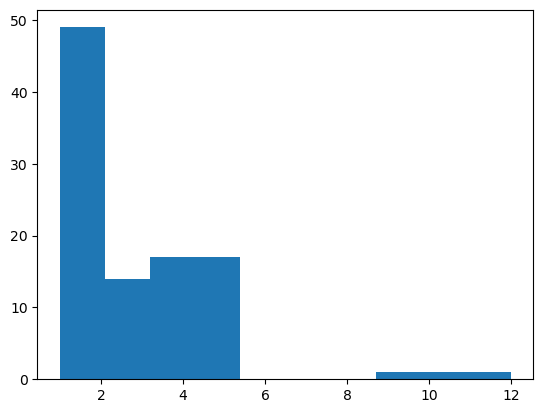

In [38]:
plt.hist(uspjeh_studenata2["Godina_Studija"])


In [40]:
for col in ['Godina_Studija']:
    uspjeh_studenata2[col] = apply_iqr_capping(uspjeh_studenata2[col])

In [41]:
uspjeh_studenata2.sort_values (by = ["Godina_Studija"])

,StudentID,Smjer,Godina_Studija,Prosjek_Ocjena,Broj_Polozenih_Ispita,Status
0,1,Informatika,1.0,3.83,8.0,Izvanredan
1,2,Pravo,1.0,4.31,3.0,Izvanredan
5,6,Medicina,1.0,4.56,8.0,Redovan
11,12,Informatika,1.0,3.00,7.0,Redovan
27,28,Strojarstvo,1.0,2.59,7.0,Izvanredan
...,...,...,...,...,...,...
74,75,Strojarstvo,5.0,1.36,7.0,Apsolvent
97,98,Pravo,5.0,4.20,10.0,Zamrznuto
44,45,Medicina,8.5,2.07,3.0,Redovan
92,93,Pravo,8.5,3.32,3.0,Redovan


(array([30., 19., 14.,  0., 17., 17.,  0.,  0.,  0.,  3.]),
 array([1.  , 1.75, 2.5 , 3.25, 4.  , 4.75, 5.5 , 6.25, 7.  , 7.75, 8.5 ]),
 <BarContainer object of 10 artists>)

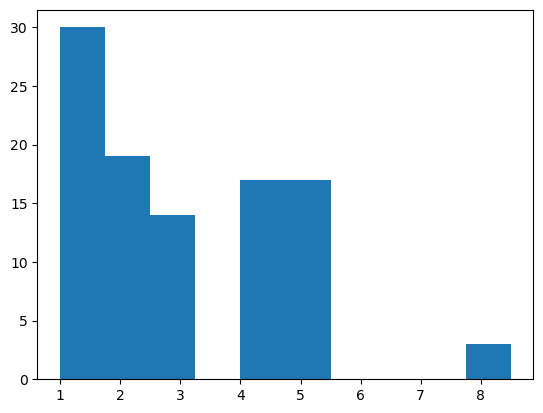

In [42]:
plt.hist(uspjeh_studenata2["Godina_Studija"])

In [ ]:
#### Prosjek ocjena

In [43]:
uspjeh_studenata2["Prosjek_Ocjena"].mean()


np.float64(3.3925263157894734)

In [44]:
uspjeh_studenata2["Prosjek_Ocjena"].fillna(value = 3.3925263157894734, inplace = True)

C:\Users\Syntari\AppData\Local\Temp\ipykernel_25136\106568286.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  uspjeh_studenata2["Prosjek_Ocjena"].fillna(value = 3.3925263157894734, inplace = True)


In [45]:
uspjeh_studenata2

,StudentID,Smjer,Godina_Studija,Prosjek_Ocjena,Broj_Polozenih_Ispita,Status
0,1,Informatika,1.0,3.830000,8.0,Izvanredan
1,2,Pravo,1.0,4.310000,3.0,Izvanredan
2,3,Informatika,5.0,2.160000,3.0,Redovan
3,4,Ekonomija,5.0,3.370000,5.0,Redovan
4,5,Informatika,4.0,4.510000,2.0,Apsolvent
...,...,...,...,...,...,...
95,96,Pravo,5.0,3.392526,7.0,Redovan
96,97,Medicina,1.0,2.280000,3.0,Redovan
97,98,Pravo,5.0,4.200000,10.0,Zamrznuto
98,99,Ekonomija,4.0,2.880000,5.0,Redovan


In [46]:
uspjeh_studenata2.sort_values (by = ["Prosjek_Ocjena"])

,StudentID,Smjer,Godina_Studija,Prosjek_Ocjena,Broj_Polozenih_Ispita,Status
74,75,Strojarstvo,5.0,1.36,7.0,Apsolvent
21,22,Informatika,5.0,1.70,3.0,Redovan
7,8,Ekonomija,5.0,1.76,8.0,Redovan
24,25,Strojarstvo,4.0,1.98,12.0,Redovan
44,45,Medicina,8.5,2.07,3.0,Redovan
...,...,...,...,...,...,...
5,6,Medicina,1.0,4.56,8.0,Redovan
90,91,Informatika,3.0,4.56,3.0,Izvanredan
79,80,Informatika,5.0,4.60,5.0,Redovan
45,46,Pravo,4.0,4.79,7.0,Izvanredan


In [47]:
uspjeh_studenata2.isna().sum()

StudentID                0
Smjer                    0
Godina_Studija           0
Prosjek_Ocjena           0
Broj_Polozenih_Ispita    6
Status                   0
dtype: int64

In [ ]:
#### Broj položenih ispita

In [48]:
Broj_Polozenih_Ispita_median = uspjeh_studenata2["Broj_Polozenih_Ispita"].median()

In [49]:
uspjeh_studenata2["Broj_Polozenih_Ispita"].fillna(value = Broj_Polozenih_Ispita_median, inplace = True)

C:\Users\Syntari\AppData\Local\Temp\ipykernel_25136\3157861278.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  uspjeh_studenata2["Broj_Polozenih_Ispita"].fillna(value = Broj_Polozenih_Ispita_median, inplace = True)


In [ ]:
### Provjera NaN

In [50]:
uspjeh_studenata2.isna().sum()

StudentID                0
Smjer                    0
Godina_Studija           0
Prosjek_Ocjena           0
Broj_Polozenih_Ispita    0
Status                   0
dtype: int64

In [ ]:
##### Streaming

In [52]:
streaming

,Unnamed: 0,KorisnikID,Starost_Korisnika,Broj_Pogledanih_Sati_Mjesecno,Broj_Uredjaja,Tip_Pretplata,Mjesecna_Pretplata_EUR
0,0,1001,52,13.9,2,Standard,17.48
1,1,1002,34,2.5,1,Obiteljska,26.62
2,2,1003,26,36.4,4,Premium,28.42
3,3,1004,21,44.1,1,Standard,17.06
4,4,1005,30,15.6,1,Standard,15.47
...,...,...,...,...,...,...,...
195,195,1196,21,10.2,1,Premium,24.11
196,196,1197,20,25.6,3,Premium,22.99
197,197,1198,20,21.9,2,Standard,14.80
198,198,1199,21,10.9,2,Standard,14.47


In [53]:
streaming.isna().sum()

Unnamed: 0                       0
KorisnikID                       0
Starost_Korisnika                0
Broj_Pogledanih_Sati_Mjesecno    0
Broj_Uredjaja                    0
Tip_Pretplata                    0
Mjesecna_Pretplata_EUR           0
dtype: int64

In [54]:
streaming.describe()

,Unnamed: 0,KorisnikID,Starost_Korisnika,Broj_Pogledanih_Sati_Mjesecno,Broj_Uredjaja,Mjesecna_Pretplata_EUR
count,200.000000,200.000000,200.000000,200.000000,200.0000,200.000000
mean,99.500000,1100.500000,35.475000,18.419500,2.0400,18.833800
std,57.879185,57.879185,66.405329,18.075052,1.2555,4.588201
min,0.000000,1001.000000,-5.000000,1.000000,1.0000,7.990000
25%,49.750000,1050.750000,23.750000,6.875000,1.0000,15.520000
50%,99.500000,1100.500000,29.000000,13.750000,2.0000,18.250000
75%,149.250000,1150.250000,35.000000,23.525000,3.0000,22.055000
max,199.000000,1200.000000,950.000000,158.500000,5.0000,32.340000


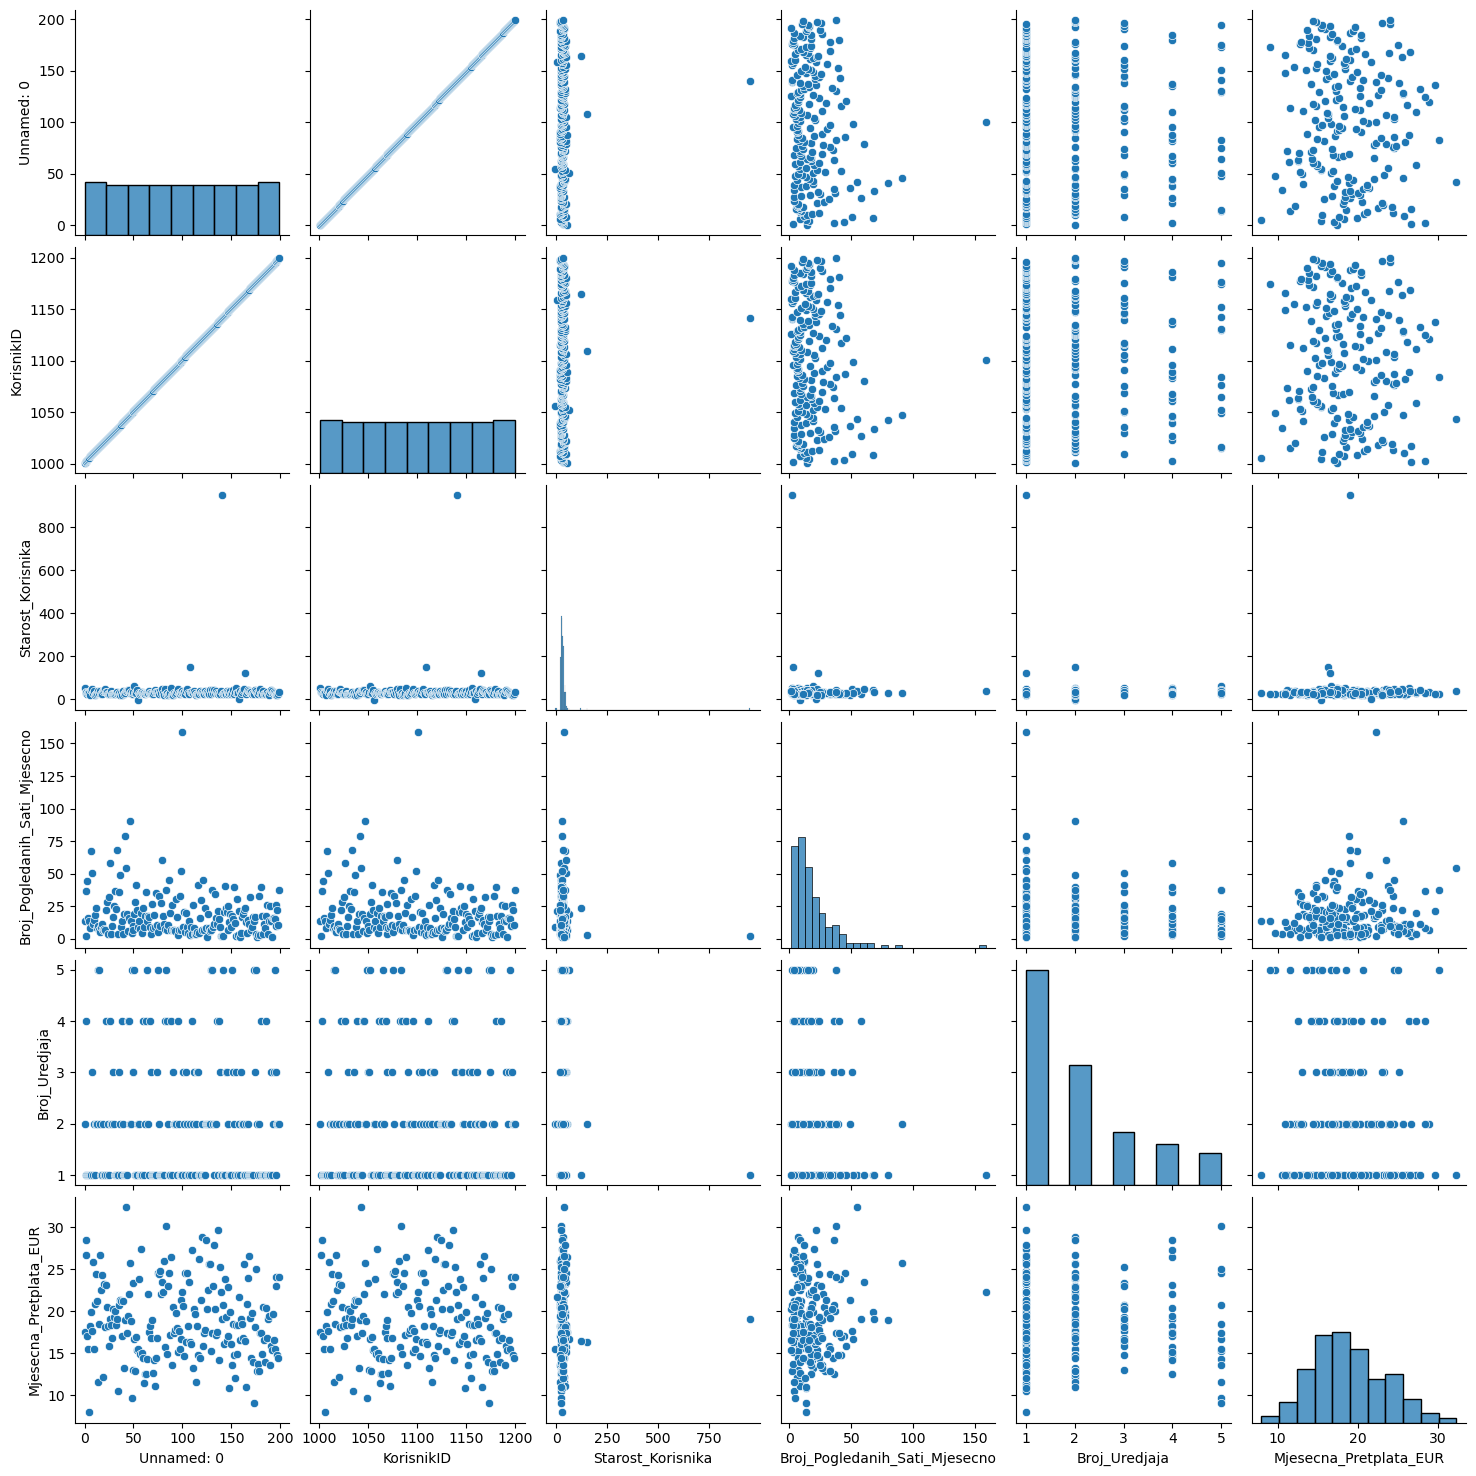

In [55]:
sns.pairplot(streaming)

(array([197.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([ -5. ,  90.5, 186. , 281.5, 377. , 472.5, 568. , 663.5, 759. ,
        854.5, 950. ]),
 <BarContainer object of 10 artists>)

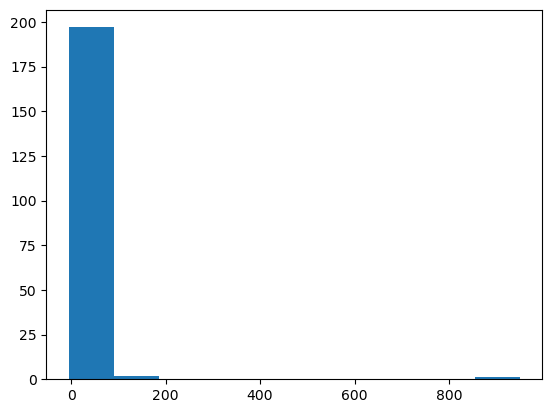

In [56]:
plt.hist(streaming.Starost_Korisnika)

In [58]:
streaming2 = streaming.copy()

In [61]:
columns=["Starost_Korisnika"] 

for col in columns:
  streaming2[col]=apply_iqr_capping(streaming2[col])

In [62]:
streaming2

,Unnamed: 0,KorisnikID,Starost_Korisnika,Broj_Pogledanih_Sati_Mjesecno,Broj_Uredjaja,Tip_Pretplata,Mjesecna_Pretplata_EUR
0,0,1001,51.875,13.9,2,Standard,17.48
1,1,1002,34.000,2.5,1,Obiteljska,26.62
2,2,1003,26.000,36.4,4,Premium,28.42
3,3,1004,21.000,44.1,1,Standard,17.06
4,4,1005,30.000,15.6,1,Standard,15.47
...,...,...,...,...,...,...,...
195,195,1196,21.000,10.2,1,Premium,24.11
196,196,1197,20.000,25.6,3,Premium,22.99
197,197,1198,20.000,21.9,2,Standard,14.80
198,198,1199,21.000,10.9,2,Standard,14.47


In [ ]:
### Drop-amo dvije kolono koje nam nisu bitne

In [63]:
streaming2.drop(columns=["Unnamed: 0", "KorisnikID"], inplace=True)

In [64]:
streaming2

,Starost_Korisnika,Broj_Pogledanih_Sati_Mjesecno,Broj_Uredjaja,Tip_Pretplata,Mjesecna_Pretplata_EUR
0,51.875,13.9,2,Standard,17.48
1,34.000,2.5,1,Obiteljska,26.62
2,26.000,36.4,4,Premium,28.42
3,21.000,44.1,1,Standard,17.06
4,30.000,15.6,1,Standard,15.47
...,...,...,...,...,...
195,21.000,10.2,1,Premium,24.11
196,20.000,25.6,3,Premium,22.99
197,20.000,21.9,2,Standard,14.80
198,21.000,10.9,2,Standard,14.47


In [66]:
streaming2.corr(numeric_only=True)

,Starost_Korisnika,Broj_Pogledanih_Sati_Mjesecno,Broj_Uredjaja,Mjesecna_Pretplata_EUR
Starost_Korisnika,1.000000,-0.002245,0.042811,0.050165
Broj_Pogledanih_Sati_Mjesecno,-0.002245,1.000000,-0.100501,0.099618
Broj_Uredjaja,0.042811,-0.100501,1.000000,-0.044507
Mjesecna_Pretplata_EUR,0.050165,0.099618,-0.044507,1.000000


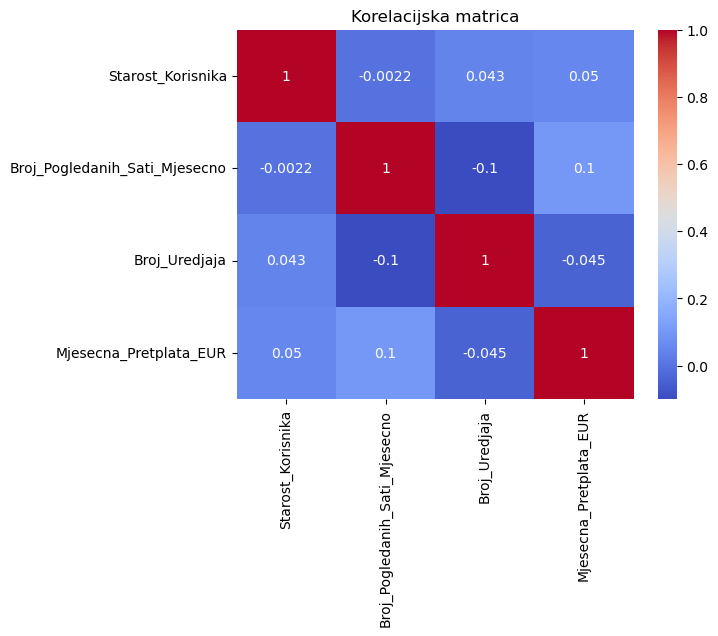

In [67]:
sns.heatmap(streaming2.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Korelacijska matrica')
plt.show()

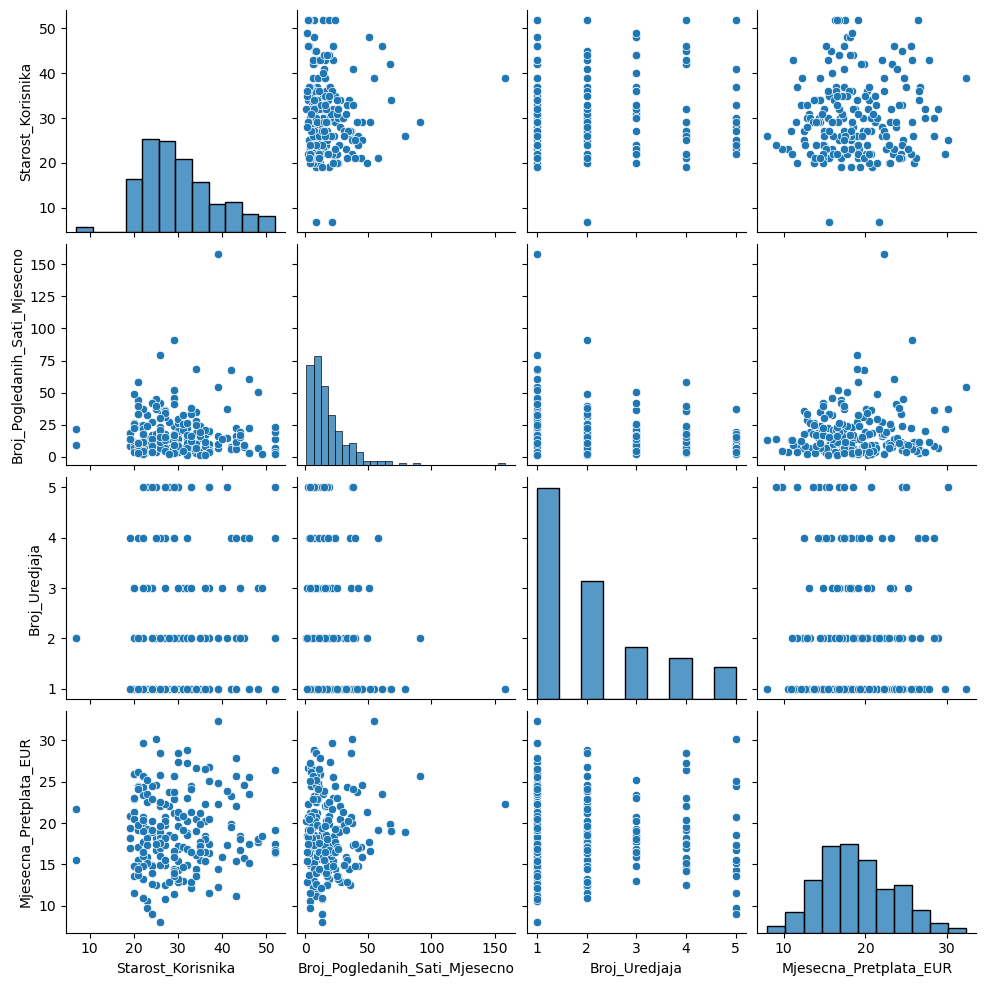

In [68]:
sns.pairplot(streaming2)

<Axes: xlabel='Broj_Uredjaja', ylabel='Mjesecna_Pretplata_EUR'>

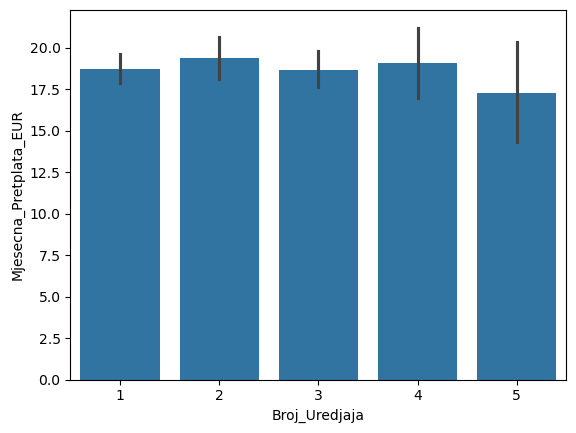

In [69]:
sns.barplot(x="Broj_Uredjaja", y="Mjesecna_Pretplata_EUR", data=streaming2)